<a href="https://colab.research.google.com/github/ronald-hk-chung/ML/blob/main/1_Training%20Simple%20Machine%20Learning%20Alogoritms%20for%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Simple Machine Learning Algorithms for Classification

We will make use of two algorithmically described machine learning algorithms for classification: the perceptron and adaptive linear neurons to classify different flower specifies in teh Iris dataset.

*   Building an understanding of machine learning algorithms
*   Using Pandas, NumPy and Matplotlib to read in, process and visualize data
*   Implementing linear classifiers for 2-class problems in Python



## Artificial neurons - Perceptron and the formal definition of an artificial neuron


### Perceptron - Brief History
Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model (<a href="https://psycnet.apa.org/doiLanding?doi=10.1037%2Fh0042519">The Perceptron: A Perceiving and Recognizing Automaton by F. Rosenblatt,
Cornell Aeronautical Laboratory, 1957</a>). His perception rule proposed an algorithm that woudl automatically learn the optimal weight coefficients that would then be muliplied wiht the input features in order to make the decision of whether a neuron fires or not. In the context of supervised learning and classification, such an algorithm could then be used to predict whether a new data point belongs to one class or the other.

### Artificial neuron definition

We can put the idea behind artifical neurons into the context of a binary classification task with two classes: 0 and 1. We can then define a decision function, $\sigma(z)$, that takes a linear combination of certain input values, $x$m and a corresponding weight vector, $w$, where $z$ is the so-called net input $z=w_1 x_1+w_2 x_2+\ldots+w_m x_m$:

$$
\boldsymbol{w}=\left[\begin{array}{c}
w_1 \\
\vdots \\
w_m
\end{array}\right], \quad \boldsymbol{x}=\left[\begin{array}{c}
x_1 \\
\vdots \\
x_m
\end{array}\right]
$$

Now, if the net input of a particular example,$x^{(i)}$, is greater than a defined threshold, $\theta$, we predict class 1, and class 0 otherwise. In the perceptron algorithm, the decision function, $\sigma(\cdot)$, is a variant of a unit step function:

$$
\sigma(z)= \begin{cases}1 & \text { if } z \geq \theta \\ 0 & \text { otherwise }\end{cases}
$$

Second, we define a *bias unit* as $b=-\theta$ and make it part of the net input:

$$
z=w_1 x_1+\ldots+w_m x_m+b=w^T x+b
$$

Given the introduction of the bias unit, we can redefine the decision function as follows:

$$
\sigma(z)= \begin{cases}1 & \text { if } z \geq 0 \\ 0 & \text { otherwise }\end{cases}
$$

Below illustrats the net input $z=w^T x+b$ is squashed into a binary output (0 or 1) by the decision function of the perceptron and how it can be used to discrimate between the two classes separable by a linear decision boundary

<img src="https://github.com/ronald-hk-chung/ML/blob/main/img/1_thresold%20function%20producing%20a%20linear%20decision%20boundary%20for%20a%20binary%20classification%20problem.jpg?raw=true">

### The perceptron learning rule

The perceptron algorithm can be summarized by the following steps:

1. Initialize the weights and bias unit to 0 or small random numbers
2. For each training example, $x^{(i)}$:
    1. Compute the output value, $\hat{y}^{(i)}$
    2. Update the weights and bias unit

The output value, $\hat{y}^{(i)}$, is the class label by the unit step function, $\sigma(\cdot)$. The simultaneous update of the bias unit and each weight, $w_j$, in the weight vector, $w$, can be written as follow:

$$
\begin{array}{ll}
& w_j:=w_j+\Delta w_j \\
\text { and } & b:=b+\Delta b
\end{array}
$$

The update values are computed as follows:

$$
\begin{array}{ll}
& \Delta w_j=\eta\left(y^{(i)}-\hat{y}^{(i)}\right) x_j^{(i)} \\
\text { and } & \Delta b=\eta\left(y^{(i)}-\hat{y}^{(i)}\right)
\end{array}
$$

where <br>
$\eta$ is the **learning rate** <br>
$y^{(i)}$ is the **true class label** <br>
$\hat{y}^{(i)}$ is the **predicted class label**

Below figure summarised the general concept of the perceptron:

<img src="https://github.com/ronald-hk-chung/ML/blob/main/img/Perceptron%20model.jpg?raw=true">




### Implimentation of Perceptron Class

We will create a Perceptron class to define the perceptron interface. The class will allow us to initialize new Perceptron objects that can learn from data via a <code>fit</code> method and make predictions via a seperate <code>predict</code> method







In [3]:
# Implimentation of Perceptron Class

import numpy as np

class Perceptron:
    '''
    Perceptron classifier

    Args:
        eta (float): Learning rate (between 0.0 and 1.0)
        n_iter (int): Passes over the training dataset
        random_state (int): Random number gerator seed for random weight initialization

    Attributes:
        w (np.ndarray): Weights after fitting
        b (np.ndarray): Bias unit after fitting
        errors (list): Number of misclassifications (updates) in each epoch
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Learning Rate
        self.n_iter = n_iter # No. of Epochs
        self.random_state = random_state

    def fit(self, X, y):
        '''
        Fit training data

        Args:
            X (np.ndarray): Training vectors with shape = [n_examples, n_features] where
                n_examples is the number of examples
                n_features is the number of features
            Y (np.ndarray): Target values with shape = [n_examples]

        Returns:
            self: object
        '''
        rgen = np.random.RandomState(self.random_state)
        # Initial weight vector contains random numbers drawn from a normal distribution
        # with standard deviation of 0.01 and size of X.shape[1]
        self.w = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b = np.float64(0.)
        self.errors = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w += update * xi
                self.b += update
                errors += int(update != 0.0)
            self.errors.append(errors)

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, 0)


### Training a perceptron model on the Iris dataset

To test our perceptron implementation, we will restrict the following analyses and examples to two feature variables (dimensions). While the perceptron rule is not restricted to two diensions, consider only two features, sepal length and petal length, will allow better visualization of the decision regions of the trained model in a scatter plot.

We will also restrict the analyses to two flower classes, setosa and versicolor, from the Iris dataset for practical reasons. Note that perceptron algoritm can be extended to multi-class classification.


In [15]:
from sklearn import datasets
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    df['target_names'] = df['target'].apply(lambda target: str(iris_dataset.target_names[target]))
    return df

iris_dataset = datasets.load_iris()
df_iris = sklearn_to_df(iris_dataset)

In [16]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
df_iris['target_names'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
# filter the Iris dataset targets to setosa 0 and versicolor 1
df_iris_filtered = df_iris[df_iris['target']<2]

#Assign X, y with filtered target and features
y = df_iris_filtered['target'].values
X = df_iris_filtered[['sepal length (cm)','petal length (cm)']].values

Below shows the distribution of flower examples in the Iris dataset along the two feature axes. In this 2-dimensional feature subspace, we can see that a linear decision boudnary is sufficient to seperate seosa from versicolor flowers. This, a linear classifier such as the perceptron should be able to classify the flowers in this dataset.

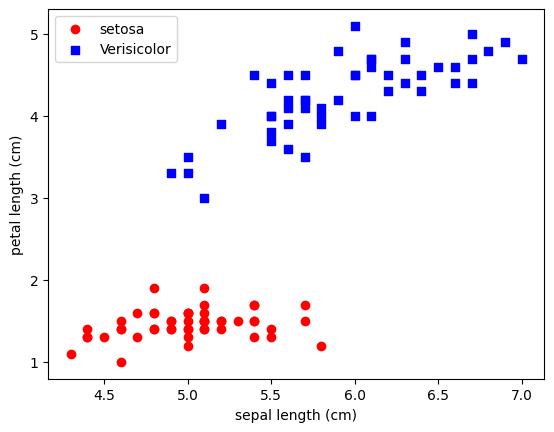

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0][y==0], X[:,1][y==0], color='red', marker='o', label='setosa')
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='blue', marker='s', label='Verisicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

Its time initialise our Perceptron Instance and train our algorithm on teh Iris data subset. We will also plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that seperates the two Iris flower classes.

In [35]:
# Initialise Perceptron Instance with learning rate = 0.1 and iteration = 10
ppn = Perceptron(eta=0.1, n_iter=10)

# Apply fit method for input features X and output y
ppn.fit(X, y)

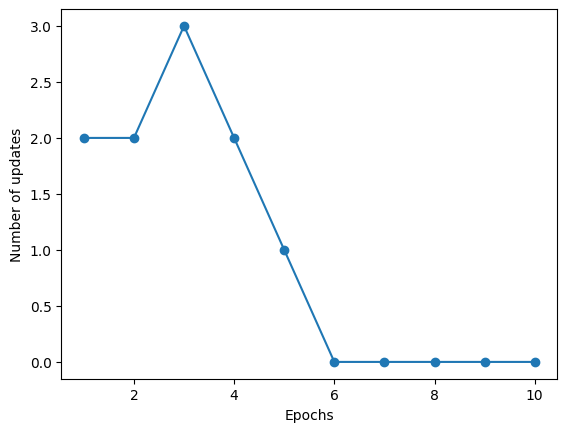

In [38]:
# Plotting out the erros vs. number of updates
plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Our perceptron converged after 6 epochs and shold now be able to classify the training examples perfectly. We will also implement a function to visualize the decision boundaries fo rthe 2-dimensional datasets

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

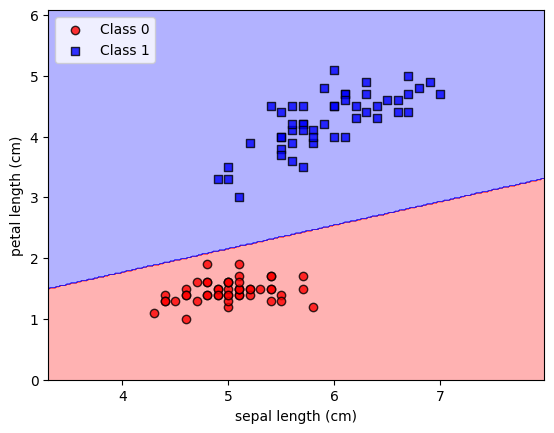

In [42]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

The perceptron learned a decision boundary that can classify all flow examples in teh Iris training subset perfectly

### Note on Perceptron convergence

Convergence is one of the biggest problems of the perceptron. Rosenblatt proved mathematically taht the perceptron learning rule converges if the two classes can be seperated by a linear hyperplane. However, if the classes cannot be seperated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs


## Adaptive linear neurons and the convergence of learning

